In [8]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.callbacks import Callback
from keras.models import Model
from Data import DataLoader
from DataLoader import Data
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from sklearn.feature_selection import mutual_info_classif
from xgboost import plot_tree
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score,accuracy_score
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------------------------------------------------------------------------
df=Data.load_data('music.csv')

trainx,testx,trainy,testy=Data.prepare_data(df,label_dict={
    'final_blues':0,
    'final_classical':1,
    'final_country':2,
    'final_disco':3,
    'final_hiphop':4,
    'final_jazz':5,
    'final_metal':6,
    'final_pop':7,
    'final_reggae':8,
    'final_rock':9
})    

def cross_entropy_loss(predicted_probs, true_labels):
    epsilon = 1e-15  # Small constant to avoid division by zero
    predicted_probs = np.clip(predicted_probs, epsilon, 1 - epsilon)  # Clip values to avoid log(0)
    
    # Convert integer true labels to one-hot encoded form
    num_classes = predicted_probs.shape[1]
    true_labels_one_hot = np.zeros_like(predicted_probs)
    true_labels_one_hot[np.arange(len(true_labels)), true_labels] = 1
    
    ce_loss = - np.sum(true_labels_one_hot * np.log(predicted_probs)) / len(true_labels)
    return ce_loss

Data Loaded, Shape : 10000 ,343


In [6]:
pc=PCA(n_components=100)
trainx=pc.fit_transform(trainx)
testx=pc.transform(testx)
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=10,max_depth=5,subsample=0.8,colsample_bynode=.8,colsample_bylevel=.8)

# Train the classifier on the training data
xgb_classifier.fit(trainx,trainy)
# Make predictions on the test data
y_pred = xgb_classifier.predict(testx)
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(testy, y_pred)
f1=f1_score(testy,y_pred,average='macro')

print("Accuracy:{}  F1 Score {}".format(accuracy,f1))


Accuracy:0.885  F1 Score 0.8840397174328615


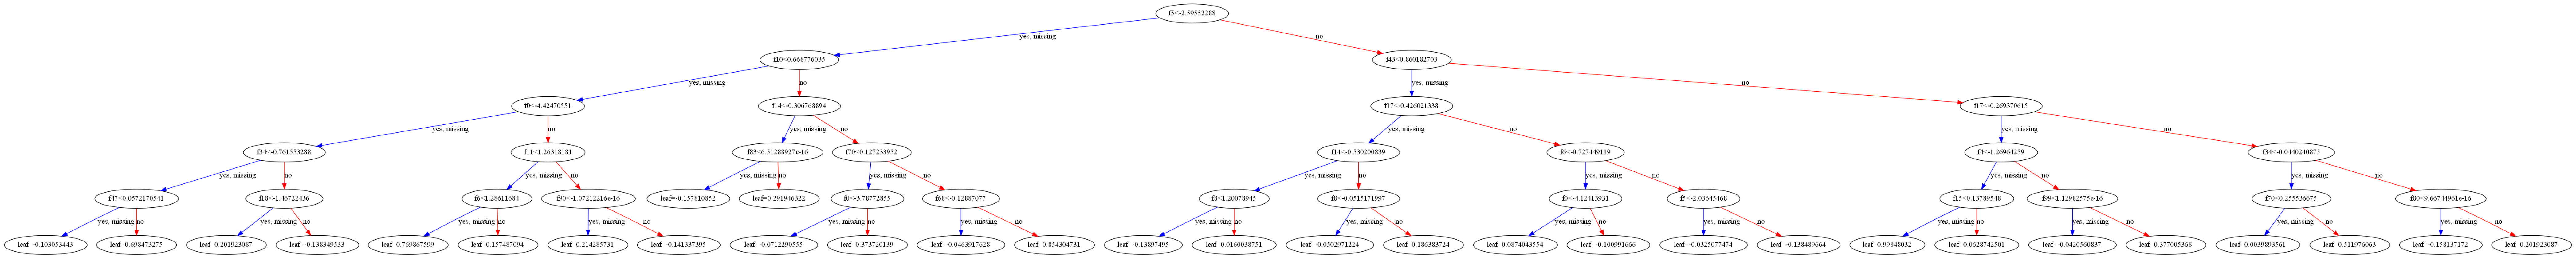

In [9]:
xgb.plot_tree(xgb_classifier, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')